In [1]:
# this is kim's notebook

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from matplotlib.lines import Line2D
from pylab import rcParams
rcParams['figure.figsize'] = 15,15


In [3]:
train = pd.read_csv("train.csv", index_col="id")
test = pd.read_csv("test.csv", index_col="id")

In [4]:
train

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,A,B,D,A,E,C,I,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
2,B,A,A,A,B,B,A,E,A,F,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
3,A,A,A,C,B,D,A,B,C,N,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
4,A,A,A,C,B,D,A,E,G,K,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
6,A,B,A,A,B,B,A,E,C,F,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499993,A,B,A,C,B,B,A,E,E,L,...,0.269578,0.258655,0.363598,0.300619,0.340516,0.235711,0.383477,0.215227,0.793630,8.343538
499996,A,B,A,C,B,B,A,E,E,L,...,0.197211,0.257024,0.574304,0.227035,0.322583,0.286094,0.324874,0.306933,0.230902,7.851861
499997,A,B,A,C,B,B,A,E,C,M,...,0.449482,0.386172,0.476217,0.135947,0.502730,0.235788,0.316671,0.250286,0.349041,7.600558


In [5]:
# Check for duplicates:

duplicates = train.duplicated()
duplicates.sum()

0

# Numerical columns:

In [6]:
numerical_columns = train[["cont0", "cont1", "cont2", "cont3", "cont4", "cont5", "cont6", "cont7", "cont8", "cont9", "cont10", "cont11", "cont12"]]
numerical_columns

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12
id,,,,,,,,,,,,,
1,0.923191,0.684968,0.124454,0.217886,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618
2,0.437627,0.014213,0.357438,0.846127,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679
3,0.732209,0.760122,0.454644,0.812990,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133
4,0.705142,0.771678,0.153735,0.732893,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799
6,0.486063,0.639349,0.496212,0.354186,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499993,0.260716,0.712438,0.161661,0.442794,0.768447,0.269578,0.258655,0.363598,0.300619,0.340516,0.235711,0.383477,0.215227
499996,0.173302,0.121591,0.592514,0.193711,0.775951,0.197211,0.257024,0.574304,0.227035,0.322583,0.286094,0.324874,0.306933
499997,0.342856,0.617869,0.462991,0.418098,0.297406,0.449482,0.386172,0.476217,0.135947,0.502730,0.235788,0.316671,0.250286


In [7]:
numerical_columns.to_csv('numerical_columns.csv')

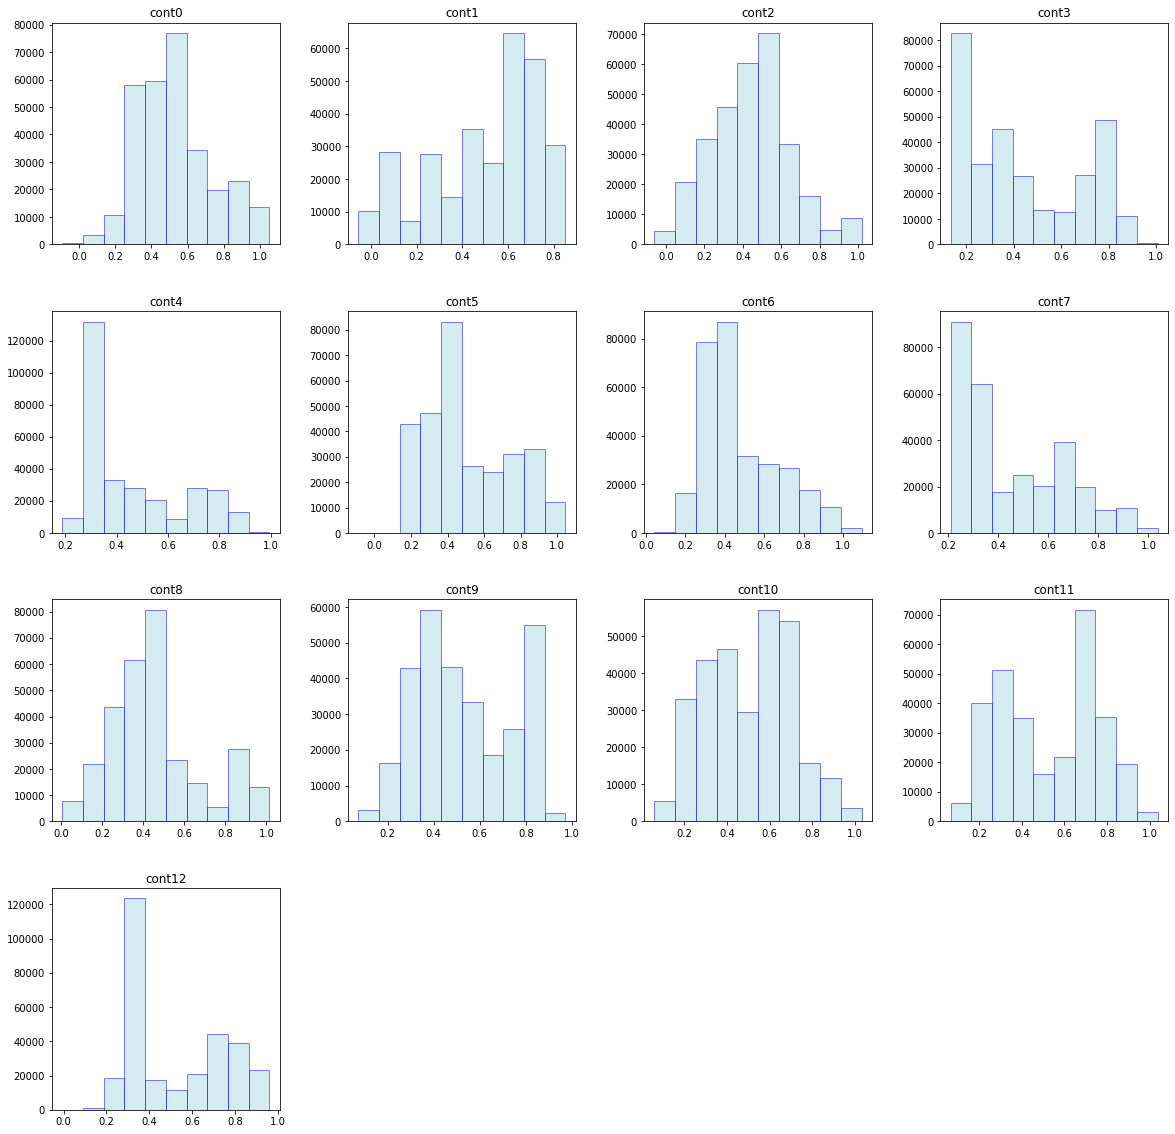

In [8]:
numerical_columns.hist(figsize=((20,20)), alpha=0.5, animated=True, edgecolor='blue', color='lightblue', grid=False)
plt.savefig("numerical_columns_hist.png");

In [9]:
numerical_columns.describe()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,0.524634,0.506649,0.444115,0.446214,0.455471,0.508337,0.478345,0.455904,0.459321,0.526899,0.504943,0.529938,0.524549
std,0.204875,0.235269,0.200089,0.238669,0.200695,0.231612,0.192432,0.204493,0.220642,0.204025,0.201549,0.230860,0.220892
min,-0.093505,-0.055105,-0.060274,0.134760,0.189216,-0.087247,0.043953,0.208703,0.004041,0.073040,0.059644,0.064161,-0.005600
25%,0.370451,0.352307,0.314121,0.214572,0.279853,0.338747,0.339896,0.278041,0.308655,0.361957,0.338898,0.316662,0.332143
50%,0.492208,0.615156,0.457271,0.377823,0.411351,0.441384,0.410090,0.360736,0.425801,0.488867,0.519855,0.558827,0.407365
75%,0.654793,0.688150,0.554835,0.719758,0.621808,0.709515,0.604246,0.639388,0.541525,0.752765,0.672809,0.720381,0.732431
max,1.052666,0.851746,1.017689,1.006469,0.994050,1.044433,1.093312,1.036541,1.014156,0.972091,1.029773,1.038049,0.961370


#### Check for outliers:

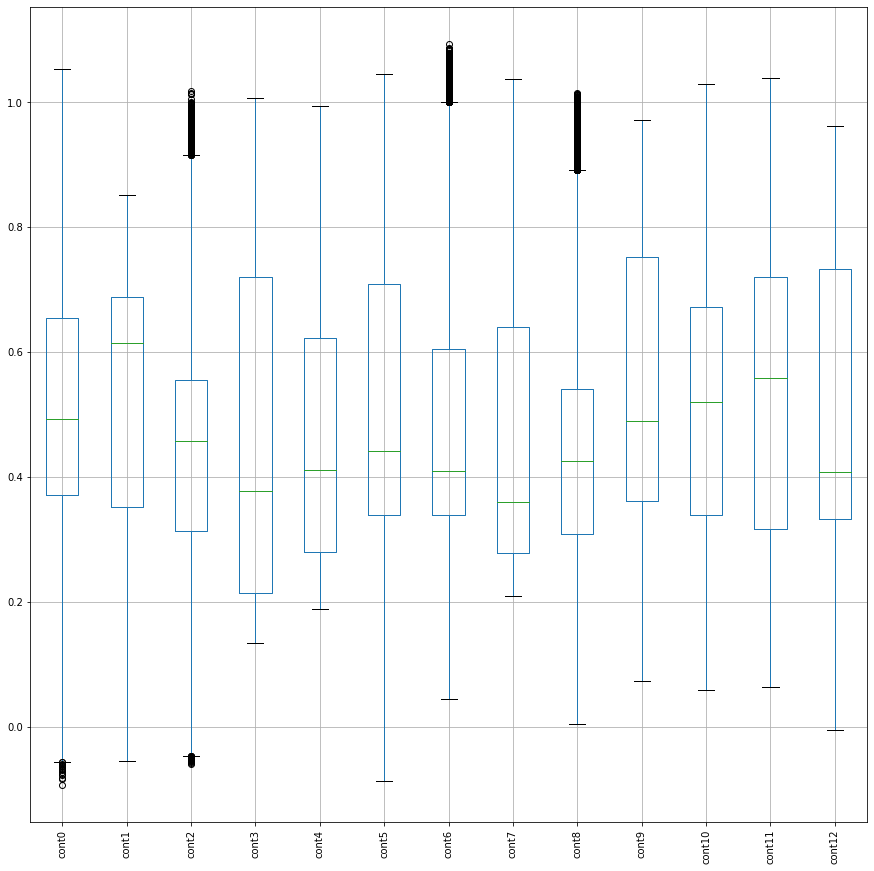

In [10]:
numerical_columns.boxplot(showcaps=True, showfliers=True)
plt.xticks(rotation=90)
plt.savefig("numerical_columns_boxplot.png");

##### "cont0" has outliers:

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


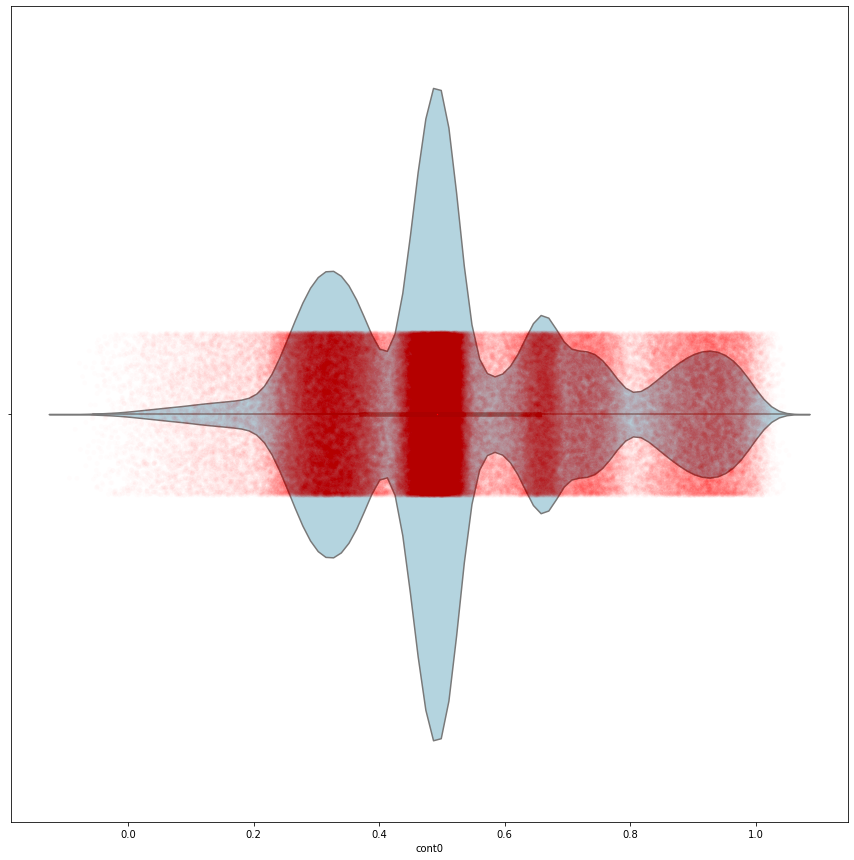

In [11]:
sns.violinplot(numerical_columns["cont0"], color='lightblue', showcaps=True, showfliers=True)
sns.stripplot(numerical_columns["cont0"], color='red', alpha=0.01)
plt.savefig("outliers_cont0.png");

In [12]:
# Find z-scores and put a threshold of 3 to determine which outliers
# are too much and need to be cut:
z=np.abs(stats.zscore(numerical_columns["cont0"]))
print(z)

print(np.where(z > 3))

[1.94537248 0.42468212 1.01318131 ... 0.88726693 0.36495082 0.24006268]
(array([132579]),)


In [13]:
numerical_columns["cont0"].iloc[[132579]]

id
220933   -0.093505
Name: cont0, dtype: float64

In [14]:
numerical_columns["cont0"].sort_values(ascending=True)

id
220933   -0.093505
404929   -0.084291
219573   -0.081515
13684    -0.077237
425346   -0.075905
            ...   
202087    1.043916
1681      1.044469
324584    1.044700
447011    1.047963
69374     1.052666
Name: cont0, Length: 300000, dtype: float64

In [15]:
#remove this outlier:
numerical_columns = numerical_columns.loc[numerical_columns["cont0"] >= -0.093]

In [16]:
# check it is removed:
numerical_columns["cont0"].sort_values(ascending=True)

id
404929   -0.084291
219573   -0.081515
13684    -0.077237
425346   -0.075905
214261   -0.072506
            ...   
202087    1.043916
1681      1.044469
324584    1.044700
447011    1.047963
69374     1.052666
Name: cont0, Length: 299999, dtype: float64

##### "cont2" outliers:

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


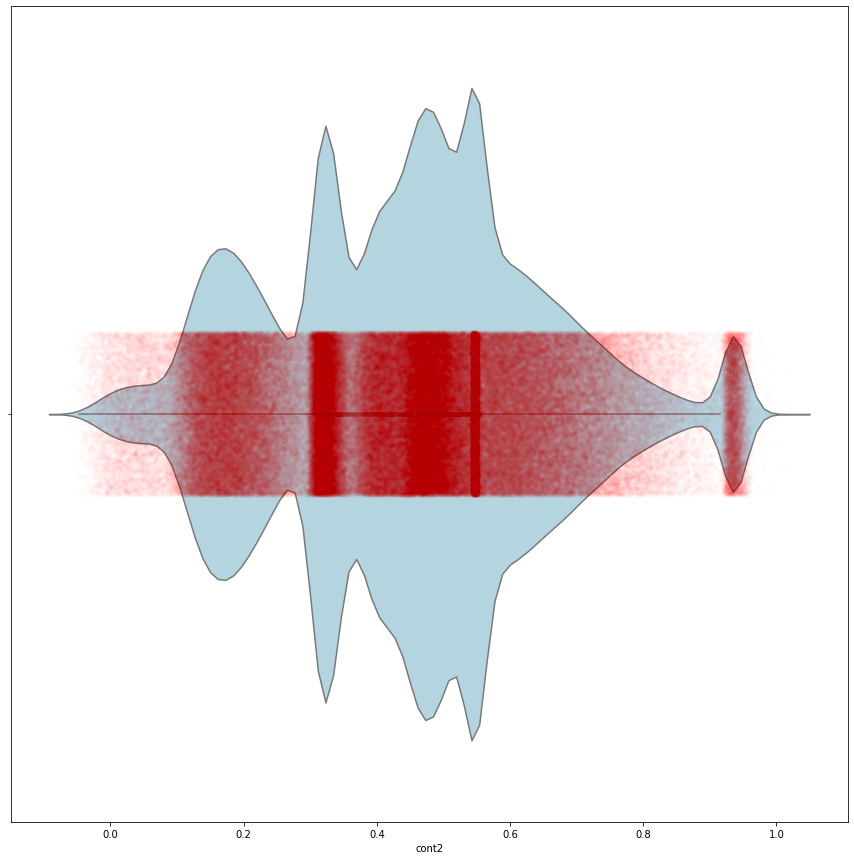

In [17]:
sns.violinplot(numerical_columns["cont2"], color='lightblue', showcaps=True, showfliers=True)
sns.stripplot(numerical_columns["cont2"], color='red', alpha=0.01)
plt.savefig("outliers_cont2.png");

In [18]:
# Find z-scores and put a threshold of 3 to determine which outliers
# are too much and need to be cut:
z=np.abs(stats.zscore(numerical_columns["cont2"]))
print(z)

print(np.where(z > 3))

[1.59759793 0.43319126 0.05262352 ... 0.09433865 1.08324665 1.54760186]
(array([], dtype=int64),)


The outliers we see on the boxplot for "cont2" are not too bad according to the zscore, so we leave them in

##### "cont6" outliers:

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


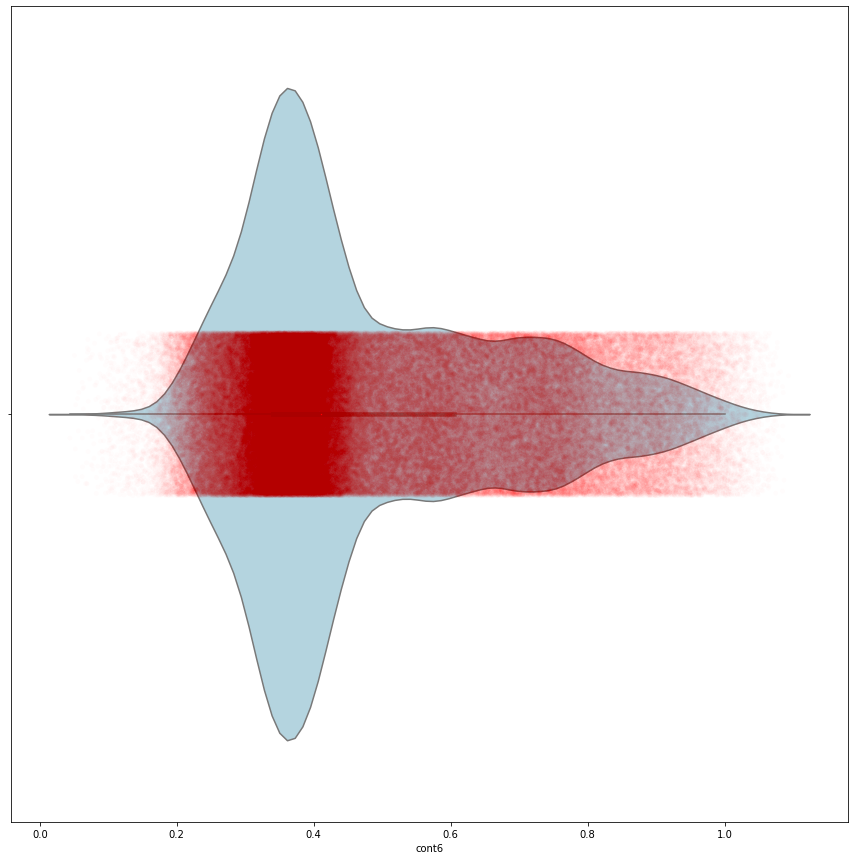

In [19]:
sns.violinplot(numerical_columns["cont6"], color='lightblue', showcaps=True, showfliers=True)
sns.stripplot(numerical_columns["cont6"], color='red', alpha=0.01)
plt.savefig("outliers_cont6.png");

In [20]:
# Find z-scores and put a threshold of 3 to determine which outliers
# are too much and need to be cut:
z=np.abs(stats.zscore(numerical_columns["cont6"]))
print(z)
print(np.where(z > 3))

[0.29462622 0.68656085 0.5651051  ... 0.47899462 0.80139199 0.38559695]
(array([  6125,   7728,   8505,  16410,  16880,  18781,  19320,  21905,
        25039,  35467,  44422,  44672,  51241,  52092,  54045,  55529,
        55914,  59087,  61317,  61685,  64366,  65652,  70458,  71572,
        74500,  76561,  78920,  80508,  84918,  88136,  88672,  92607,
        94038,  95339,  96018,  97433, 105634, 105668, 108028, 118206,
       124990, 125178, 125748, 126994, 127057, 128958, 129818, 131344,
       132985, 134681, 135550, 137701, 138189, 138275, 138452, 140136,
       141804, 141917, 153455, 157157, 162105, 163001, 166433, 171160,
       176000, 178727, 179023, 190373, 190804, 194994, 199365, 200468,
       202823, 204651, 209079, 209900, 213498, 214783, 214845, 217840,
       222078, 227161, 230078, 231553, 234209, 241165, 241990, 243316,
       245600, 246726, 250876, 251245, 253861, 255532, 256128, 258303,
       258779, 263563, 269401, 272345, 272511, 274033, 278827, 279558,
    

In [21]:
# find where z is greater than three:
x = z.tolist()
x = sorted(x, reverse=True)
print(x[:150])
print("Index of first value with z-score > 3: ", np.where(z == 3.0010249691534847))

[3.195756354453222, 3.161758092248282, 3.1559984990770604, 3.152176549268084, 3.1512678109873233, 3.150835824302558, 3.150475112245965, 3.1418086042657216, 3.1359349293585437, 3.120543842762439, 3.1194070468369786, 3.1150381290759683, 3.114510051281511, 3.110891977598992, 3.1099826572685583, 3.1076491672148983, 3.105746605573868, 3.1055110871106306, 3.1015087548165514, 3.099589260821392, 3.0985331581460853, 3.097674529050831, 3.0965982662913873, 3.091665818619459, 3.089952264381416, 3.084567458286161, 3.0843568621316577, 3.0818958502859495, 3.081058862855819, 3.080825619677666, 3.079633952342099, 3.079295146518663, 3.079111853785195, 3.0760324935320704, 3.0756623099398848, 3.074279677397886, 3.072426748719903, 3.0713153513256395, 3.0706878488642695, 3.065132025992292, 3.0644521390603314, 3.0606717793461877, 3.059941465747082, 3.0572391678550077, 3.056568117495359, 3.056205553462533, 3.0542645765430683, 3.0517887488874953, 3.051485765575766, 3.051332263202849, 3.049842851002614, 3.04691

In [22]:
numerical_columns["cont6"].iloc[[16410]]

id
27416    1.055839
Name: cont6, dtype: float64

In [23]:
np.where(z == 2.999924948184652)

(array([254380]),)

In [24]:
numerical_columns["cont6"].iloc[[254380]]

id
424257    1.055627
Name: cont6, dtype: float64

In [25]:
# remove the outliers with value greater than 1.055627:
numerical_columns = numerical_columns.loc[numerical_columns["cont6"] <= 1.055627]

In [26]:
# check they are removed:
numerical_columns["cont6"].sort_values(ascending=False).head(100)

id
288401    1.055433
464768    1.055190
23114     1.055177
196426    1.055144
470092    1.055005
            ...   
125965    1.046173
72178     1.045820
232808    1.045736
228463    1.045722
404987    1.045715
Name: cont6, Length: 100, dtype: float64

##### "cont8" outliers:

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


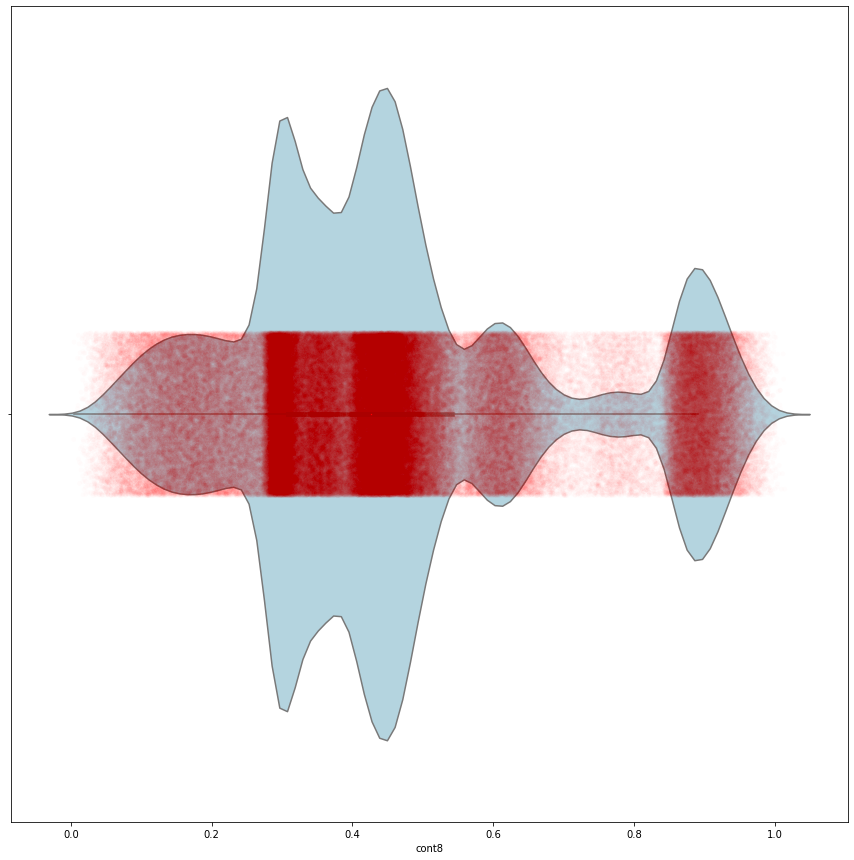

In [27]:
sns.violinplot(numerical_columns["cont8"], color='lightblue', showcaps=True, showfliers=True)
sns.stripplot(numerical_columns["cont8"], color='red', alpha=0.01)
plt.savefig("outliers_cont8.png");

In [28]:
# Find z-scores and put a threshold of 3 to determine which outliers
# are too much and need to be cut:
z=np.abs(stats.zscore(numerical_columns["cont8"]))
print(z)
print(np.where(z > 3))

[1.97824479 0.60780041 1.84146699 ... 1.46548034 1.08051956 0.17525778]
(array([], dtype=int64),)


The outliers we see on the boxplot for "cont8" are not too bad according to the zscore, so we leave them in

In [29]:
numerical_columns.to_csv('numerical_columns_noOutliers.csv')

### Correlation matrix:

In [30]:
numerical_columns["target"] = train["target"]

In [ ]:
numerical_columns.corr()

In [31]:
numerical_columns.corr().style.background_gradient(cmap ='coolwarm');

In [32]:
print("Numerical columns most correlated with target column:\n", abs(corr["target"]).sort_values(ascending=False))

NameError: name 'corr' is not defined

# Categorical columns:

In [ ]:
categorical_columns = train[["cat0", "cat1", "cat2", "cat3", "cat4", "cat5", "cat6", "cat7", "cat8", "cat9"]]
categorical_columns

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
id,,,,,,,,,,
1,A,B,A,A,B,D,A,E,C,I
2,B,A,A,A,B,B,A,E,A,F
3,A,A,A,C,B,D,A,B,C,N
4,A,A,A,C,B,D,A,E,G,K
6,A,B,A,A,B,B,A,E,C,F
...,...,...,...,...,...,...,...,...,...,...
499993,A,B,A,C,B,B,A,E,E,L
499996,A,B,A,C,B,B,A,E,E,L
499997,A,B,A,C,B,B,A,E,C,M


In [ ]:
categorical_columns.to_csv('categorical_columns.csv')

In [ ]:
categorical_columns.describe(include='all')

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
count,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000
unique,2,2,2,4,4,4,8,8,7,15
top,A,A,A,C,B,B,A,E,C,F
freq,281471,162678,276551,183752,297373,149208,292643,267631,121054,107281


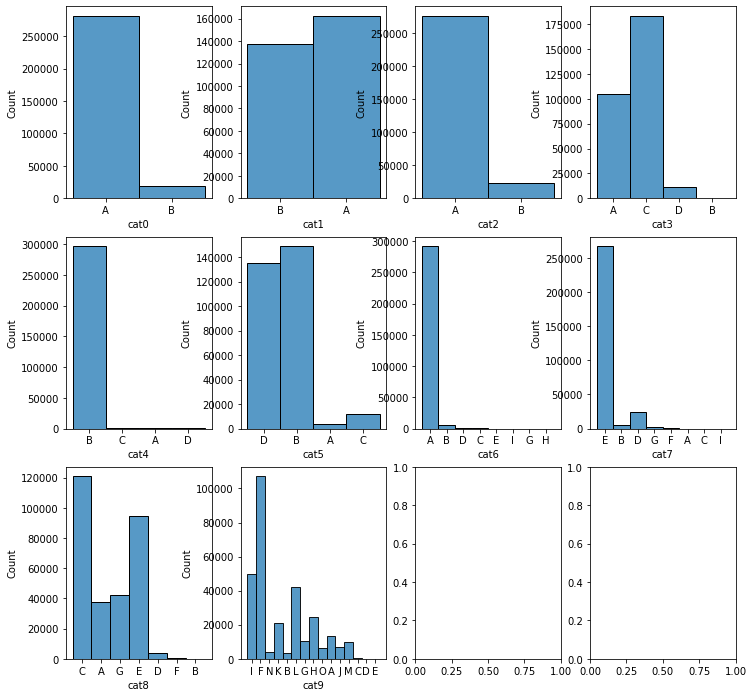

In [ ]:
num_rows, num_cols = 3,4
f, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 12))
for index, column in enumerate(categorical_columns.columns):
    i,j = (index // num_cols, index % num_cols)
    sns.histplot(x=column, data=categorical_columns, ax=axes[i,j])
plt.savefig("categorical_columns_plots.png")

##### Ordinal Encoder:

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
X = categorical_columns
enc.fit(X)

OrdinalEncoder()

In [ ]:
enc.categories_

[array(['A', 'B'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', 'B', 'C', 'D'], dtype=object),
 array(['A', 'B', 'C', 'D'], dtype=object),
 array(['A', 'B', 'C', 'D'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'G', 'H', 'I'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
        'N', 'O'], dtype=object)]

In [ ]:
ordinal_categorical_columns = enc.transform(categorical_columns)
ordinal_categorical_columns

array([[ 0.,  1.,  0., ...,  4.,  2.,  8.],
       [ 1.,  0.,  0., ...,  4.,  0.,  5.],
       [ 0.,  0.,  0., ...,  1.,  2., 13.],
       ...,
       [ 0.,  1.,  0., ...,  4.,  2., 12.],
       [ 0.,  1.,  1., ...,  3.,  4.,  5.],
       [ 0.,  0.,  1., ...,  4.,  2., 10.]])

In [ ]:
ordinal_categorical_columns = pd.DataFrame(ordinal_categorical_columns)
ordinal_categorical_columns

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,4.0,2.0,8.0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,5.0
2,0.0,0.0,0.0,2.0,1.0,3.0,0.0,1.0,2.0,13.0
3,0.0,0.0,0.0,2.0,1.0,3.0,0.0,4.0,6.0,10.0
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...
299995,0.0,1.0,0.0,2.0,1.0,1.0,0.0,4.0,4.0,11.0
299996,0.0,1.0,0.0,2.0,1.0,1.0,0.0,4.0,4.0,11.0
299997,0.0,1.0,0.0,2.0,1.0,1.0,0.0,4.0,2.0,12.0
299998,0.0,1.0,1.0,2.0,1.0,1.0,0.0,3.0,4.0,5.0


In [ ]:
ordinal_categorical_columns.to_csv('ordinal_categorical_columns.csv')

##### One-Hot Encoding:

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')

In [ ]:
enc.fit(categorical_columns)

OneHotEncoder(handle_unknown='ignore')

In [ ]:
enc.categories_

[array(['A', 'B'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', 'B', 'C', 'D'], dtype=object),
 array(['A', 'B', 'C', 'D'], dtype=object),
 array(['A', 'B', 'C', 'D'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'G', 'H', 'I'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
        'N', 'O'], dtype=object)]

In [ ]:
onehot_categorical_columns = enc.transform(categorical_columns).toarray()
onehot_categorical_columns

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

In [ ]:
onehot_categorical_colnames = enc.get_feature_names((['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']))
onehot_categorical_colnames

array(['cat0_A', 'cat0_B', 'cat1_A', 'cat1_B', 'cat2_A', 'cat2_B',
       'cat3_A', 'cat3_B', 'cat3_C', 'cat3_D', 'cat4_A', 'cat4_B',
       'cat4_C', 'cat4_D', 'cat5_A', 'cat5_B', 'cat5_C', 'cat5_D',
       'cat6_A', 'cat6_B', 'cat6_C', 'cat6_D', 'cat6_E', 'cat6_G',
       'cat6_H', 'cat6_I', 'cat7_A', 'cat7_B', 'cat7_C', 'cat7_D',
       'cat7_E', 'cat7_F', 'cat7_G', 'cat7_I', 'cat8_A', 'cat8_B',
       'cat8_C', 'cat8_D', 'cat8_E', 'cat8_F', 'cat8_G', 'cat9_A',
       'cat9_B', 'cat9_C', 'cat9_D', 'cat9_E', 'cat9_F', 'cat9_G',
       'cat9_H', 'cat9_I', 'cat9_J', 'cat9_K', 'cat9_L', 'cat9_M',
       'cat9_N', 'cat9_O'], dtype=object)

In [ ]:
onehot_categorical_columns = pd.DataFrame(onehot_categorical_columns, columns=onehot_categorical_colnames)

In [ ]:
onehot_categorical_columns

,cat0_A,cat0_B,cat1_A,cat1_B,cat2_A,cat2_B,cat3_A,cat3_B,cat3_C,cat3_D,...,cat9_F,cat9_G,cat9_H,cat9_I,cat9_J,cat9_K,cat9_L,cat9_M,cat9_N,cat9_O
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
299996,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
299997,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
299998,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
onehot_categorical_columns.to_csv('onehot_categorical_columns.csv')

### Binary Encoding:

In [ ]:
from category_encoders import *
enc = BinaryEncoder().fit(categorical_columns, train["target"])

/root/venv/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
binary_categorical_columns = enc.transform(categorical_columns)
binary_categorical_columns

,cat0_0,cat0_1,cat1_0,cat1_1,cat2_0,cat2_1,cat3_0,cat3_1,cat3_2,cat4_0,...,cat7_3,cat8_0,cat8_1,cat8_2,cat8_3,cat9_0,cat9_1,cat9_2,cat9_3,cat9_4
id,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,1,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,1,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
3,0,1,1,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1
4,0,1,1,0,0,1,0,1,0,0,...,1,0,0,1,1,0,0,1,0,0
6,0,1,0,1,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499993,0,1,0,1,0,1,0,1,0,0,...,1,0,1,0,0,0,0,1,1,0
499996,0,1,0,1,0,1,0,1,0,0,...,1,0,1,0,0,0,0,1,1,0
499997,0,1,0,1,0,1,0,1,0,0,...,1,0,0,0,1,0,1,1,0,0


In [ ]:
binary_categorical_columns.to_csv('binary_categorical_columns.csv')

# Point for next step - modelling:
- Try each different encoded set for the categorical_columns.
- See which one gives best result in modelling.


# Point:
- Only drop **features** from train if they are not present in test.
- Can also remove the **values** (rows) which are not present in test set.

# Target:

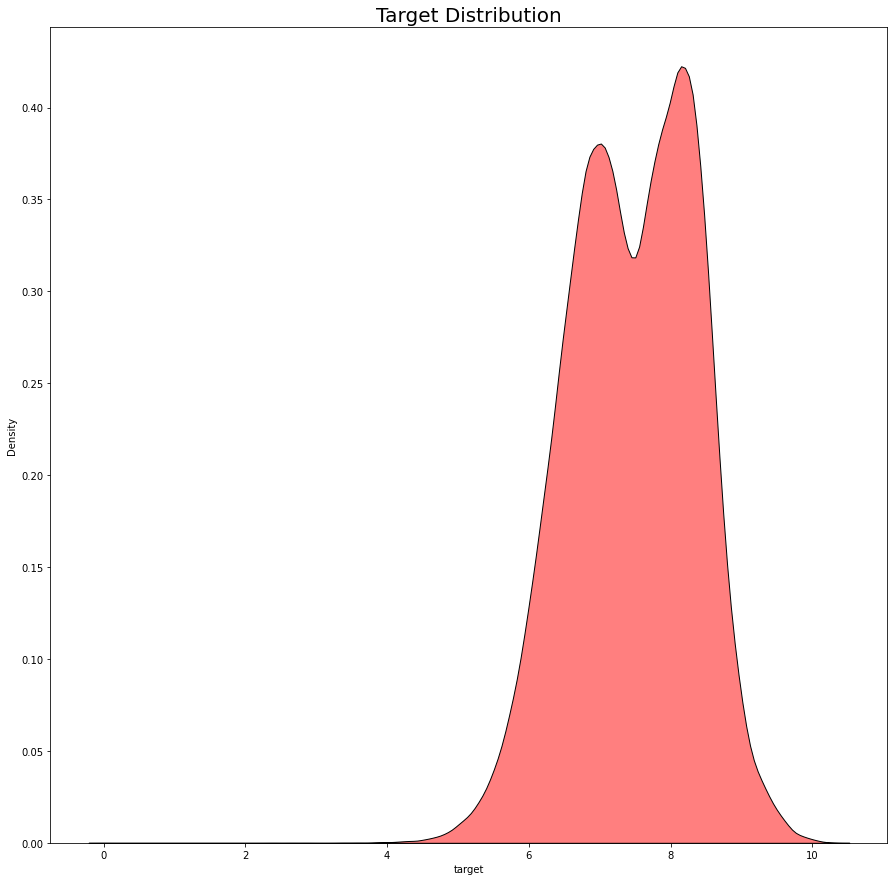

In [ ]:
ax = sns.kdeplot(train["target"], shade=True, color='red', edgecolor='black', alpha=0.5, zorder=3)
plt.title('Target Distribution', fontsize=20)
plt.savefig("target_plot.png")

# Point for next step - modelling:
 - Try modelling with untouched target variable.
 - Also try modelling with changes to the target varaible, like removing outliers.

# Feature Engineering

#### Log Transformations:

##### Log Transform of "cont0" column:

In [ ]:
log_numerical_columns = pd.DataFrame()

In [ ]:
log_numerical_columns['cont0_log'] = np.log((1+ numerical_columns['cont0']))

In [ ]:
cont0_log_mean = np.round(np.mean(log_numerical_columns['cont0_log']), 2)

Plot the original cont0 with the log_cont0:

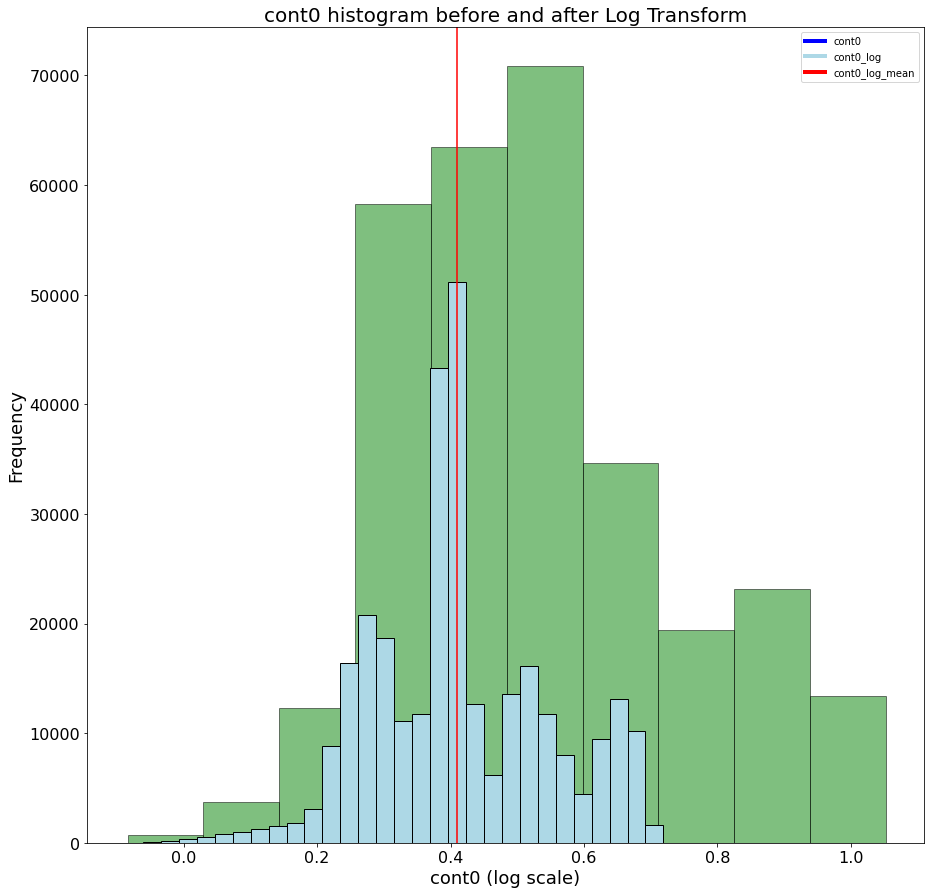

In [ ]:
plt.hist(numerical_columns["cont0"], color='green', alpha=0.5, edgecolor='black')
plt.hist(log_numerical_columns['cont0_log'], bins=30, color='lightblue', edgecolor='black')
plt.axvline(cont0_log_mean, color='red')
plt.title('cont0 histogram before and after Log Transform', fontsize=20)
plt.xlabel('cont0 (log scale)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# custom legend
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='lightblue', lw=4),
                Line2D([0], [0], color='red', lw=4)]

plt.legend(custom_lines, ['cont0', 'cont0_log', 'cont0_log_mean'])
plt.savefig("log_cont0_plot");

##### Log Transform of "cont1" column:

In [ ]:
log_numerical_columns['cont1_log'] = np.log((1+ numerical_columns['cont1']))
cont1_log_mean = np.round(np.mean(log_numerical_columns['cont1_log']), 2)

Plot the original cont1 with the log_cont1:

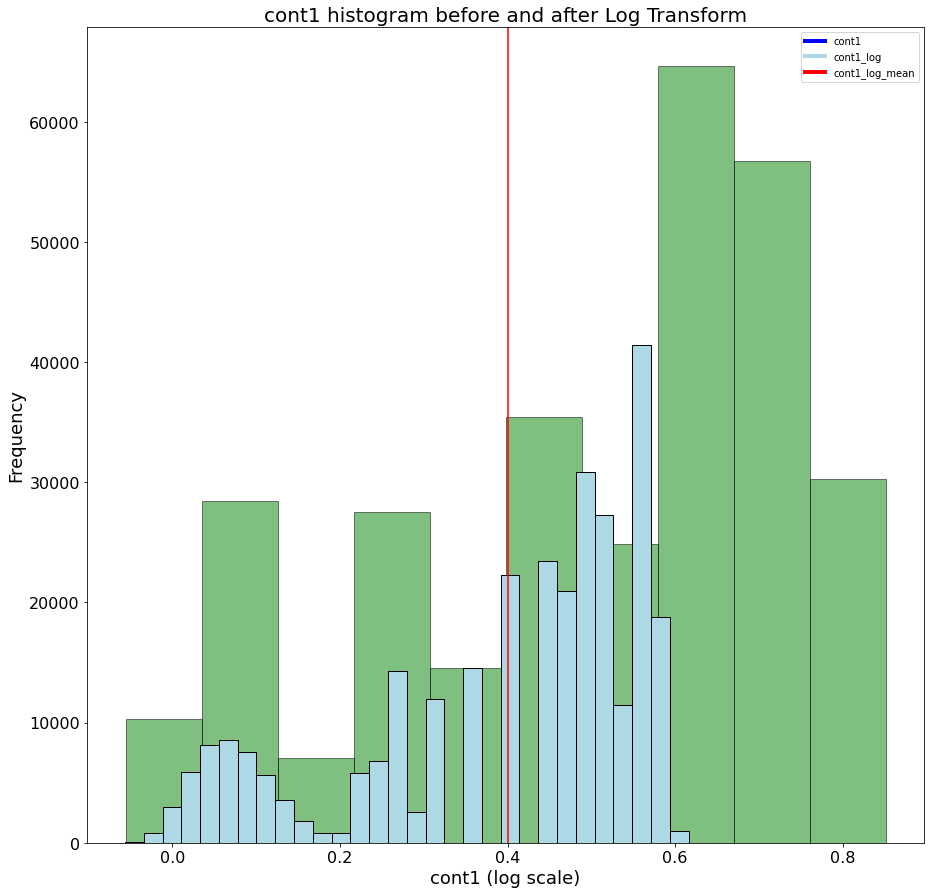

In [ ]:
plt.hist(numerical_columns["cont1"], color='green', alpha=0.5, edgecolor='black')
plt.hist(log_numerical_columns['cont1_log'], bins=30, color='lightblue', edgecolor='black')
plt.axvline(cont1_log_mean, color='red')
plt.title('cont1 histogram before and after Log Transform', fontsize=20)
plt.xlabel('cont1 (log scale)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# custom legend
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='lightblue', lw=4),
                Line2D([0], [0], color='red', lw=4)]

plt.legend(custom_lines, ['cont1', 'cont1_log', 'cont1_log_mean'])
plt.savefig("log_cont1_plot.png");

##### Log Transform of all "cont" columns:

In [ ]:
log_numerical_columns['cont2_log'] = np.log((1+ numerical_columns['cont2']))
cont2_log_mean = np.round(np.mean(log_numerical_columns['cont2_log']), 2)

log_numerical_columns['cont3_log'] = np.log((1+ numerical_columns['cont3']))
cont3_log_mean = np.round(np.mean(log_numerical_columns['cont3_log']), 2)

log_numerical_columns['cont4_log'] = np.log((1+ numerical_columns['cont4']))
cont4_log_mean = np.round(np.mean(log_numerical_columns['cont4_log']), 2)

log_numerical_columns['cont5_log'] = np.log((1+ numerical_columns['cont5']))
cont5_log_mean = np.round(np.mean(log_numerical_columns['cont5_log']), 2)

log_numerical_columns['cont6_log'] = np.log((1+ numerical_columns['cont6']))
cont6_log_mean = np.round(np.mean(log_numerical_columns['cont6_log']), 2)

log_numerical_columns['cont7_log'] = np.log((1+ numerical_columns['cont7']))
cont7_log_mean = np.round(np.mean(log_numerical_columns['cont7_log']), 2)

log_numerical_columns['cont8_log'] = np.log((1+ numerical_columns['cont8']))
cont8_log_mean = np.round(np.mean(log_numerical_columns['cont8_log']), 2)

log_numerical_columns['cont9_log'] = np.log((1+ numerical_columns['cont9']))
cont9_log_mean = np.round(np.mean(log_numerical_columns['cont9_log']), 2)

log_numerical_columns['cont10_log'] = np.log((1+ numerical_columns['cont10']))
cont10_log_mean = np.round(np.mean(log_numerical_columns['cont10_log']), 2)

log_numerical_columns['cont11_log'] = np.log((1+ numerical_columns['cont11']))
cont11_log_mean = np.round(np.mean(log_numerical_columns['cont11_log']), 2)

log_numerical_columns['cont12_log'] = np.log((1+ numerical_columns['cont12']))
cont12_log_mean = np.round(np.mean(log_numerical_columns['cont12_log']), 2)

In [ ]:
log_numerical_columns

,cont0_log,cont1_log,cont2_log,cont3_log,cont4_log,cont5_log,cont6_log,cont7_log,cont8_log,cont9_log,cont10_log,cont11_log,cont12_log
id,,,,,,,,,,,,,
1,0.653986,0.521747,0.117297,0.197117,0.247970,0.631868,0.351818,0.554697,0.639641,0.589153,0.544889,0.531754,0.630004
2,0.362994,0.014113,0.305599,0.613090,0.248697,0.364651,0.297308,0.245684,0.465878,0.435707,0.478252,0.554626,0.282679
3,0.549397,0.565383,0.374761,0.594978,0.257550,0.649276,0.314520,0.605716,0.623593,0.601718,0.234363,0.528014,0.625474
4,0.533648,0.571927,0.143005,0.549792,0.570858,0.659662,0.456747,0.341682,0.624922,0.584672,0.401637,0.529525,0.593216
6,0.396130,0.494299,0.402937,0.303200,0.246161,0.323966,0.534116,0.281558,0.365315,0.379905,0.544907,0.520621,0.295246
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499993,0.231680,0.537918,0.149851,0.366582,0.570102,0.238685,0.230043,0.310127,0.262840,0.293055,0.211647,0.324600,0.194931
499996,0.159822,0.114748,0.465314,0.177067,0.574336,0.179995,0.228747,0.453813,0.204600,0.279587,0.251610,0.281317,0.267683
499997,0.294798,0.481110,0.380483,0.349317,0.260367,0.371206,0.326546,0.389482,0.127467,0.407283,0.211709,0.275106,0.223373


In [ ]:
log_numerical_columns.to_csv('log_numerical_columns.csv')

In [ ]:
# check how the log transformations are correlated with target:


The log transformed features are slightly more correlated with the target than the original feature.

# Point:
- Do all log transformations on numerical_columns, save this as an extra dataframe and use for modelling, to compare to score achieved when using the original numerical columns.

# Question:
How do we choose the features? Is it the features that are not correlated with each other? Is it the features that are most correlated with the target? But then, how to cross-reference that? How do we choose the features most correlated with the target, but not so correlated with each other?

- try PCA


#### Feature Selection:

- Try "binning" for feature reduction / selection.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=14627e03-5cc7-4767-87c2-ea44d911271b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>